In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
%matplotlib inline

In [2]:
ahmed=pd.read_csv('2020.csv')

In [3]:
ahmed.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [4]:
ahmed.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,1.530000e+02,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,0.053538,5.578175,5.368304,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120,1.972317e+00,0.868771,1.155607,0.692869,0.463583,0.189375,0.130718,1.972317
std,1.11227,0.018183,1.096823,1.128631,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172,1.336643e-15,0.372416,0.286866,0.254094,0.141172,0.100401,0.113097,0.563638
min,2.56690,0.025902,2.628270,2.505530,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784,1.972317e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257241
25%,4.72410,0.040698,4.826248,4.603149,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019,1.972317e+00,0.575862,0.986718,0.495443,0.381457,0.115006,0.055805,1.629928
50%,5.51500,0.050606,5.607728,5.430644,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122,1.972317e+00,0.918549,1.203987,0.759818,0.483293,0.176745,0.098435,2.046272
75%,6.22850,0.060677,6.363886,6.138881,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151,1.972317e+00,1.169229,1.387139,0.867249,0.576665,0.255510,0.163064,2.350267
max,7.80870,0.120590,7.869766,7.747634,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585,1.972317e+00,1.536676,1.547567,1.137814,0.693270,0.569814,0.533162,3.440810


In [5]:
ahmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

In [6]:
ahmed.isnull().sum()


Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [7]:
ahmed.dtypes

Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

In [8]:
ahmed.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [9]:
ahmed.astype(object, copy=True, errors='raise')

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.0311563,7.86977,7.74763,10.6393,0.95433,71.9008,0.949172,-0.059482,0.195445,1.97232,1.28519,1.49953,0.961271,0.662317,0.15967,0.477857,2.76284
1,Denmark,Western Europe,7.6456,0.0334923,7.71124,7.57996,10.774,0.955991,72.4025,0.951444,0.0662018,0.168489,1.97232,1.32695,1.50345,0.979333,0.66504,0.242793,0.49526,2.43274
2,Switzerland,Western Europe,7.5599,0.0350142,7.62853,7.49127,10.9799,0.942847,74.1024,0.921337,0.105911,0.303728,1.97232,1.39077,1.4724,1.04053,0.628954,0.269056,0.407946,2.35027
3,Iceland,Western Europe,7.5045,0.0596159,7.62135,7.38765,10.7726,0.97467,73,0.948892,0.246944,0.71171,1.97232,1.3265,1.54757,1.00084,0.661981,0.36233,0.144541,2.46069
4,Norway,Western Europe,7.488,0.0348374,7.55628,7.41972,11.0878,0.952487,73.2008,0.95575,0.134533,0.263218,1.97232,1.42421,1.49517,1.00807,0.670201,0.287985,0.434101,2.16827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.70166,3.25014,6.62516,0.31946,45.2,0.640881,0.0824104,0.891807,1.97232,0.0410721,0,0,0.292814,0.253513,0.0282647,2.8602
149,Rwanda,Sub-Saharan Africa,3.3123,0.0524252,3.41505,3.20955,7.6001,0.540835,61.0988,0.900589,0.055484,0.183541,1.97232,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.0586745,3.4142,3.1842,7.86571,0.763093,55.6173,0.711458,-0.072064,0.810237,1.97232,0.425564,1.04784,0.375038,0.377405,0.151349,0.0809286,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.10761,3.02752,2.60568,7.42536,0.553707,51,0.451314,0.0165185,0.763417,1.97232,0.289083,0.553279,0.208809,0.0656093,0.209935,0.111157,1.37875


In [10]:
ahmed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

In [11]:
ahmed.columns = ahmed.columns.str.replace(' ', '_')

In [12]:
ahmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country_name                                153 non-null    object 
 1   Regional_indicator                          153 non-null    object 
 2   Ladder_score                                153 non-null    float64
 3   Standard_error_of_ladder_score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged_GDP_per_capita                       153 non-null    float64
 7   Social_support                              153 non-null    float64
 8   Healthy_life_expectancy                     153 non-null    float64
 9   Freedom_to_make_life_choices                153 non-null    float64
 10  Generosity    

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
ahmed=ahmed.apply(le.fit_transform)


In [14]:
ahmed.head()

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by:_Log_GDP_per_capita,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Freedom_to_make_life_choices,Explained_by:_Generosity,Explained_by:_Perceptions_of_corruption,Dystopia_+_residual
0,42,9,152,5,152,152,130,149,124,148,66,3,0,130,149,124,148,66,149,143
1,35,9,151,10,151,151,139,150,132,149,107,1,0,139,150,132,149,107,151,127
2,131,9,150,16,150,150,145,145,147,137,123,7,0,145,145,147,137,123,145,114
3,56,9,149,109,149,147,138,152,136,147,144,45,0,138,152,136,147,144,107,129
4,105,9,148,14,148,149,146,148,139,150,132,6,0,146,148,139,150,132,146,92


In [15]:
ahmed.dtypes

Country_name                                  int32
Regional_indicator                            int32
Ladder_score                                  int64
Standard_error_of_ladder_score                int64
upperwhisker                                  int64
lowerwhisker                                  int64
Logged_GDP_per_capita                         int64
Social_support                                int64
Healthy_life_expectancy                       int64
Freedom_to_make_life_choices                  int64
Generosity                                    int64
Perceptions_of_corruption                     int64
Ladder_score_in_Dystopia                      int64
Explained_by:_Log_GDP_per_capita              int64
Explained_by:_Social_support                  int64
Explained_by:_Healthy_life_expectancy         int64
Explained_by:_Freedom_to_make_life_choices    int64
Explained_by:_Generosity                      int64
Explained_by:_Perceptions_of_corruption       int64
Dystopia_+_r

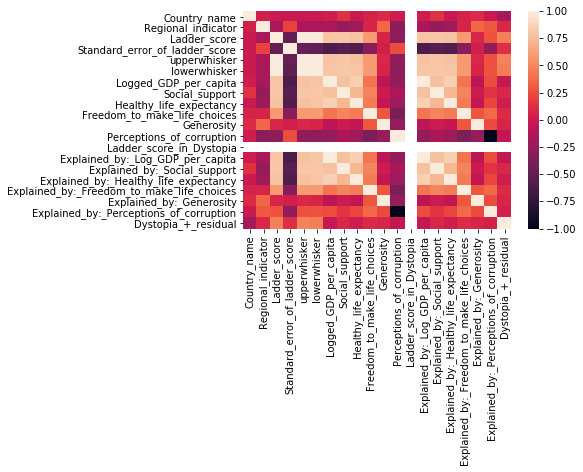

In [50]:
sns.heatmap(ahmed.corr(),
            xticklabels=ahmed.columns,
            yticklabels=ahmed.columns
           )

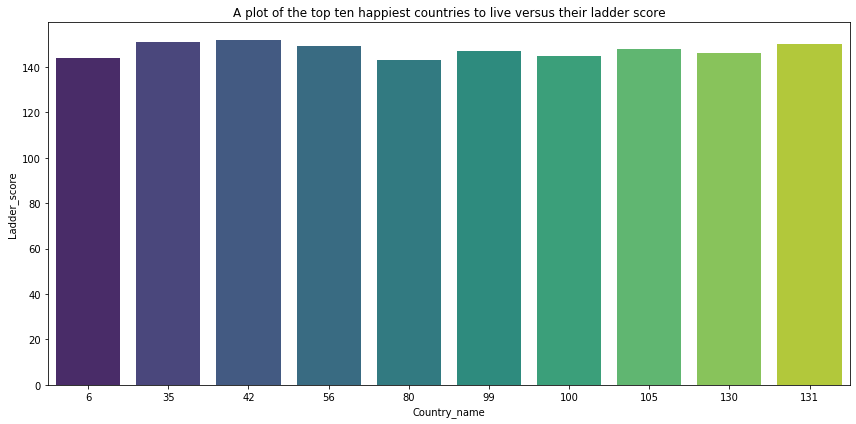

In [56]:
plt.figure(figsize=(12,6))
sns.barplot(x=ahmed['Country_name'].head(10),y='Ladder_score',data=ahmed,palette='viridis')
plt.title('A plot of the top ten happiest countries to live versus their ladder score')
plt.tight_layout()

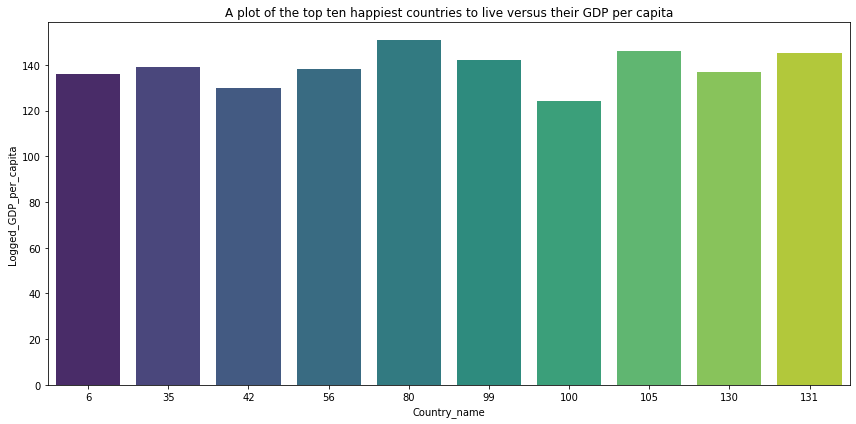

In [58]:
plt.figure(figsize=(12,6))
sns.barplot(x=ahmed['Country_name'].head(10),y='Logged_GDP_per_capita',data=ahmed,palette='viridis')
plt.title('A plot of the top ten happiest countries to live versus their GDP per capita')
plt.tight_layout()

In [61]:
ahmed.groupby('Country_name')['Logged_GDP_per_capita'].sum().sort_values(ascending=False).head(10)


Country_name
80     151
121    150
61     149
143    148
71     147
105    146
131    145
54     144
145    143
99     142
Name: Logged_GDP_per_capita, dtype: int64

In [73]:
ahmed.columns

Index(['Country_name', 'Regional_indicator', 'Ladder_score',
       'Standard_error_of_ladder_score', 'upperwhisker', 'lowerwhisker',
       'Logged_GDP_per_capita', 'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption', 'Ladder_score_in_Dystopia',
       'Explained_by:_Log_GDP_per_capita', 'Explained_by:_Social_support',
       'Explained_by:_Healthy_life_expectancy',
       'Explained_by:_Freedom_to_make_life_choices',
       'Explained_by:_Generosity', 'Explained_by:_Perceptions_of_corruption',
       'Dystopia_+_residual'],
      dtype='object')

In [76]:
ahmed=ahmed.fillna(ahmed.median())

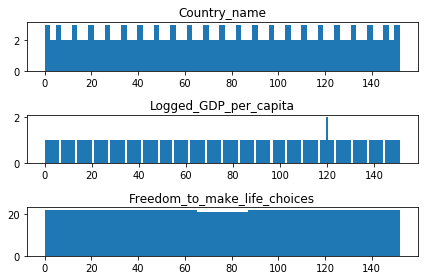

In [79]:
fig, axes = plt.subplots(nrows=3, ncols=1)
ax0, ax1, ax2 = axes.flatten()

ax0.hist(ahmed['Country_name'], 65, histtype='bar')
ax0.set_title('Country_name')

ax1.hist(ahmed['Logged_GDP_per_capita'], 173, histtype='bar')
ax1.set_title('Logged_GDP_per_capita')

ax2.hist(ahmed['Freedom_to_make_life_choices'], 7, histtype='bar')
ax2.set_title('Freedom_to_make_life_choices')

fig.tight_layout()
plt.show()

In [81]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
D_cluster = AgglomerativeClustering(n_clusters=4 )
X_D=D_cluster.fit(ahmed)
Y_pred_D = D_cluster.fit_predict(ahmed)

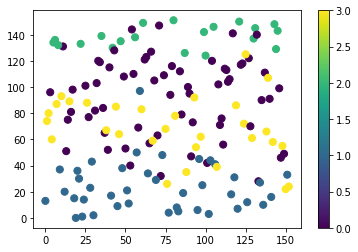

In [84]:
import matplotlib.pyplot as plt
fig= plt.figure()
ax=fig.add_subplot(111)
scatter=ax.scatter(ahmed['Country_name'],ahmed['Logged_GDP_per_capita'],c=agg[0],s=50)
plt.colorbar(scatter)

In [40]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
D_cluster = AgglomerativeClustering(n_clusters=3 )
X_D=D_cluster.fit(ahmed)
Y_pred_D = D_cluster.fit_predict(ahmed)


In [41]:
agg=pd.DataFrame(Y_pred_D)
agg

,0
0,2
1,2
2,2
3,2
4,2
...,...
148,0
149,0
150,0
151,0


In [25]:
Z = linkage(ahmed, 'ward')

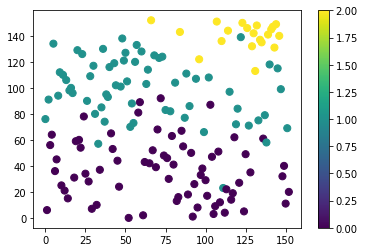

In [44]:
import matplotlib.pyplot as plt
fig= plt.figure()
ax=fig.add_subplot(111)
scatter=ax.scatter(ahmed['Generosity'],ahmed['Ladder_score'],c=agg[0],s=50)
plt.colorbar(scatter)

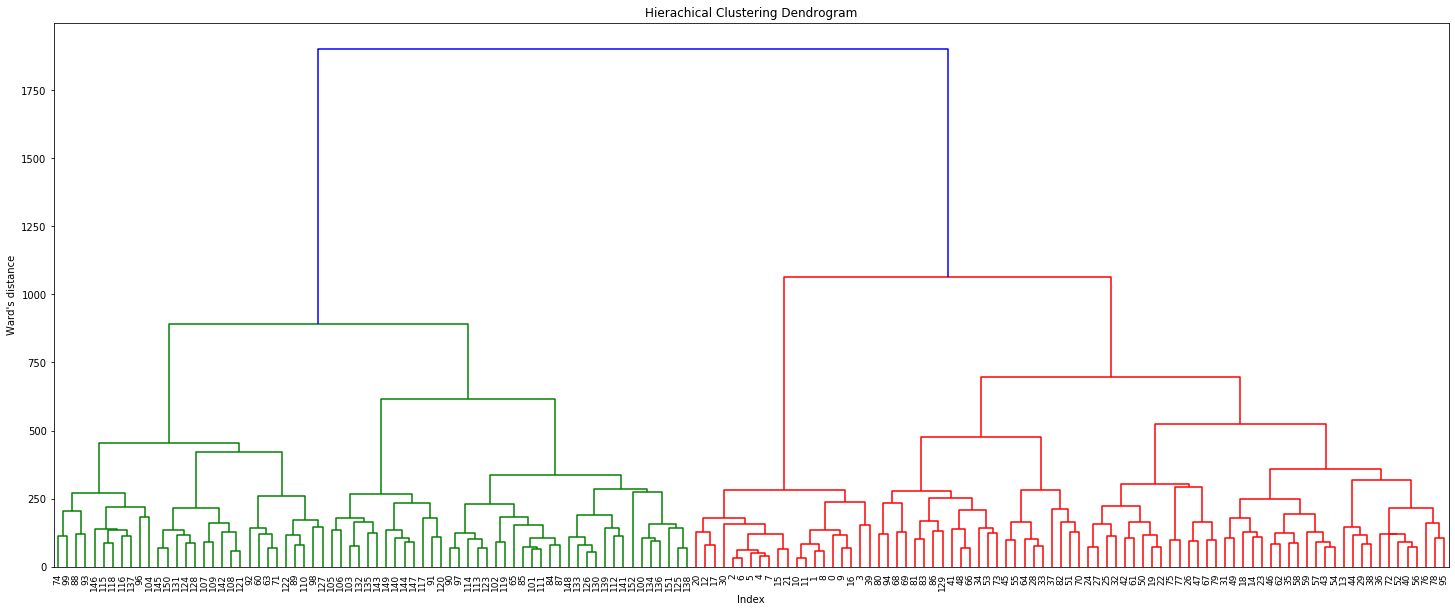

In [29]:
plt.figure(figsize=(25,10))
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
dendrogram(Z,
           leaf_rotation=90.,
           leaf_font_size=9.,);
plt.axhline(150000, c='k');

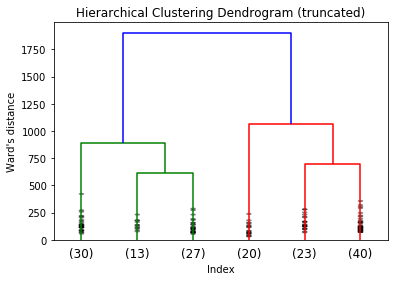

In [31]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Index')
plt.ylabel("Ward's distance")
dendrogram(Z, truncate_mode='lastp',
           p=6, leaf_rotation=0., leaf_font_size=12.,
           show_contracted=True);
plt.axhline(150000, c='k');

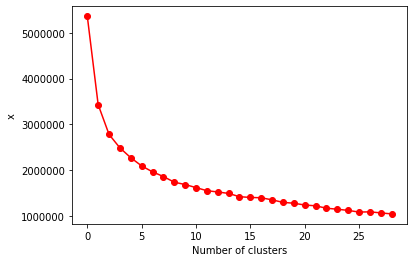

In [33]:
from sklearn.cluster import KMeans
x = []
for i in range( 1, 30 ):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict(ahmed)
    x.append( kmeans.inertia_ )
    
plt.plot( x, 'ro-', label="WCSS")
plt.xlabel("Number of clusters")
plt.ylabel("x")
plt.show()

In [54]:
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300) 
y_pred = kmeans.fit_predict(ahmed)

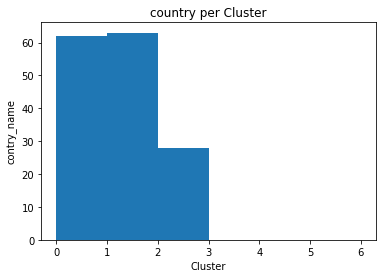

In [55]:
plt.hist(y_pred, bins=range(7))
plt.title('country per Cluster')
plt.xlabel('Cluster')
plt.ylabel('contry_name')
plt.show()

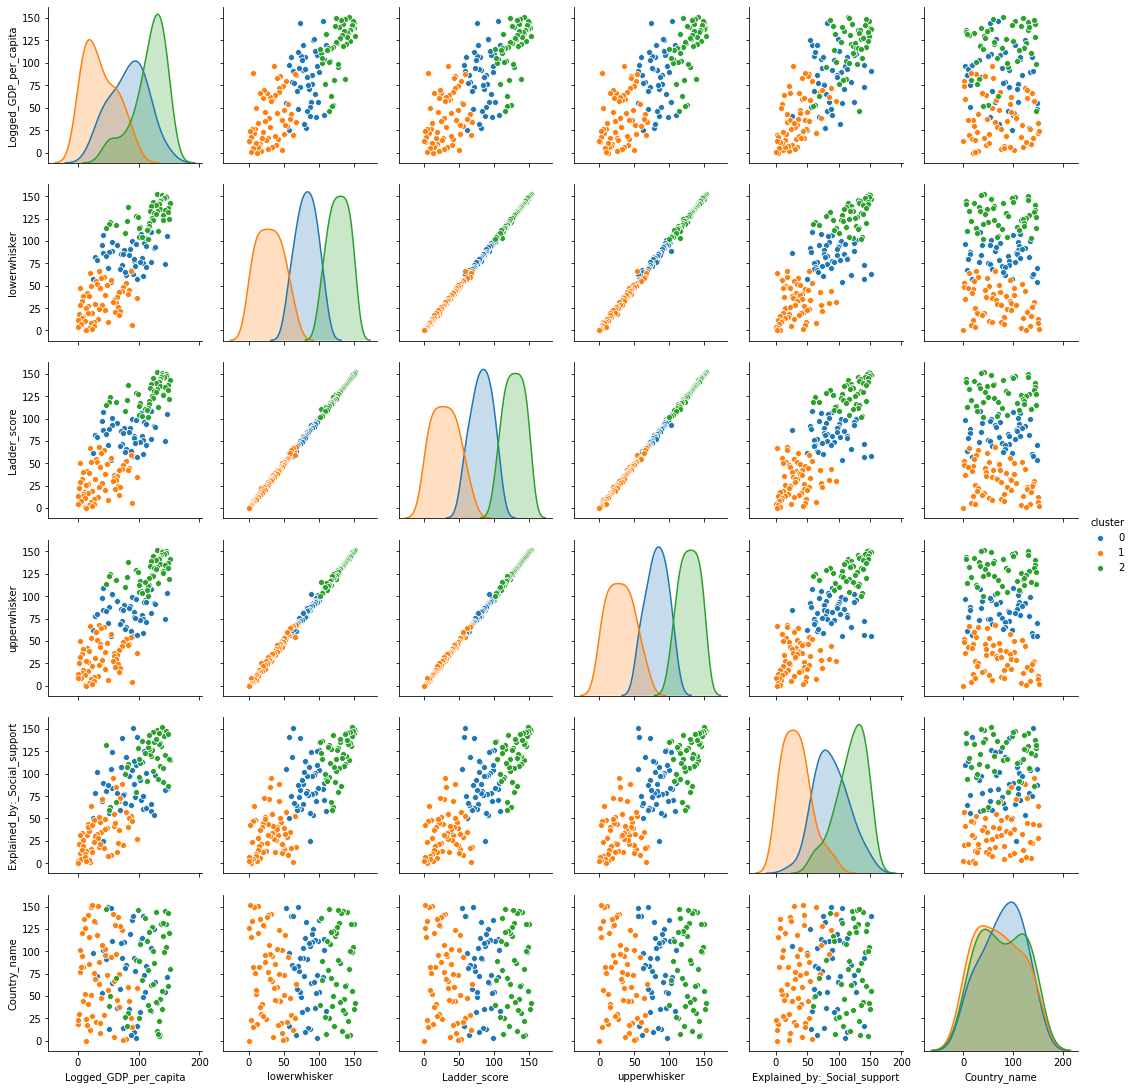

In [59]:
best_cols = ["Logged_GDP_per_capita", "lowerwhisker", "Ladder_score","upperwhisker", "Explained_by:_Social_support","Country_name"]
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300) 
best_vals = ahmed[best_cols].iloc[ :, 1:].values
y_pred = kmeans.fit_predict( best_vals )

ahmed["cluster"] = y_pred
best_cols.append("cluster")
sns.pairplot( ahmed[ best_cols ], hue="cluster")